In [283]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
import numpy as np
import copy
import json

import seaborn as sns

sns.set_theme(style="white", font_scale=1, font="sans-serif", rc={'font.sans-serif': ['DejaVu Sans']})
sns.set_context("paper")

In [414]:
def get_plot(_instruments, title=None, xlabel=None, len_max= None, legend=False):
    fig, axes = plt.subplots(2, 1, figsize =(3, 3*7/8), height_ratios=[0.8, 0.2], sharex=True)
    
    plt.rcParams['xtick.bottom'] = True
    plt.rcParams['ytick.left'] = True
    
    plt.subplots_adjust(wspace=0, hspace=0)

    x = [10**i for i in range(len(_instruments[0][1]))][:len_max]
    for ins in _instruments:
        axes[0].plot(x, list(ins[1].values())[:len_max], label=ins[0], color=ins[2], marker='o')

    if legend:
        axes[0].legend()
    
    axes[0].set_xscale('log')
    axes[0].set_yscale('log')
    axes[0].set_ylabel("Duration [s]")


    real_instruments = copy.deepcopy(_instruments[1:])
    for inst in real_instruments:
        for idx, el in enumerate(inst[1]):
            inst[1][el] /= _instruments[0][1][el]

    for ins in real_instruments:
        axes[1].plot(x, list(ins[1].values())[:len_max], label=ins[0], color=ins[2], marker='o')

    #axes[1].set_ylabel("Experiment duration\n(ratio with ideal time)", rotation=0)
    axes[1].set_ylabel("Relative \n duration")
    #axes[1].yaxis.set_label_coords(-.25, 0.3)
    axes[1].set_yscale('log')
    axes[1].set_ylim(1, None)
    
        
    axes[0].grid(alpha=0.2)
    axes[1].grid(alpha=0.2)
    
    if xlabel:
        plt.xlabel(xlabel)
    else:
        plt.xlabel("Number of values swept")
    if title:
        axes[0].set_title(title, fontsize=12)
        plt.savefig(f"{title}.pdf",
            bbox_inches ="tight")
    return axes

### RO frequency

In [415]:
path = "data/scaling/"
name = "res_freq"

_ = json.load(open(f"{path}ideal/{name}.json"))
ideal = {key: _[key]["acquisition"] for key in _ if key != "date"}

_ = json.load(open(f"{path}rfsoc/{name}.json"))
rfsoc = {key: _[key]["acquisition"] for key in _ if key != "date"}

_ = json.load(open(f"{path}zh/{name}.json"))
zurich = {key: _[key]["acquisition"] for key in _ if key != "date"}

_ = json.load(open(f"{path}qm/{name}.json"))
qm = {key: _[key]["acquisition"] for key in _ if key != "date"}

_ = json.load(open(f"{path}qblox/{name}.json"))
qblox = {key: _[key]["acquisition"] for key in _ if key != "date"}

In [416]:
instruments_ro_freq = [
    ("Ideal", ideal, "#072448"),
    ("Zhinst", zurich, "#54d2d2"),
    ("RFSoC", rfsoc, "#ffcb00"),
    ("QM", qm, "#f8aa4b"),
    ("QBlox", qblox, "#ff6150"),
]

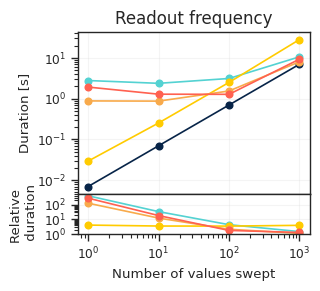

In [417]:
axes = get_plot(instruments_ro_freq, "Readout frequency")

### Drive frequency

In [418]:
path = "data/scaling/"
name = "drive_freq"

_ = json.load(open(f"{path}ideal/{name}.json"))
ideal = {key: _[key]["acquisition"] for key in _ if key != "date"}

_ = json.load(open(f"{path}rfsoc/{name}.json"))
rfsoc = {key: _[key]["acquisition"] for key in _ if key != "date"}

_ = json.load(open(f"{path}zh/{name}.json"))
zurich = {key: _[key]["acquisition"] for key in _ if key != "date"}

_ = json.load(open(f"{path}qm/{name}.json"))
qm = {key: _[key]["acquisition"] for key in _ if key != "date"}

_ = json.load(open(f"{path}qblox/{name}.json"))
qblox = {key: _[key]["acquisition"] for key in _ if key != "date"}

In [419]:
instruments_drive_freq = [
    ("Ideal", ideal, "#072448"),
    ("Zhinst", zurich, "#54d2d2"),
    ("RFSoC", rfsoc, "#ffcb00"),
    ("QM", qm, "#f8aa4b"),
    ("QBlox", qblox, "#ff6150"),
]

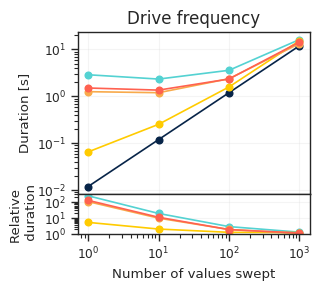

In [420]:
fig1 = get_plot(instruments_drive_freq, "Drive frequency")

### Pulse len

In [421]:
path = "data/scaling/"
name = "rabi_len"

_ = json.load(open(f"{path}ideal/{name}.json"))
ideal = {key: _[key]["acquisition"] for key in _ if key != "date"}

_ = json.load(open(f"{path}rfsoc/{name}.json"))
rfsoc = {key: _[key]["acquisition"] for key in _ if key != "date"}

_ = json.load(open(f"{path}zh/{name}.json"))
zurich = {key: _[key]["acquisition"] for key in _ if key != "date"}

_ = json.load(open(f"{path}qm/{name}.json"))
qm = {key: _[key]["acquisition"] for key in _ if key != "date"}

_ = json.load(open(f"{path}qblox/{name}.json"))
qblox = {key: _[key]["acquisition"] for key in _ if key != "date"}

In [422]:
instruments_len = [
    ("Ideal", ideal, "#072448"),
    ("Zhinst", zurich, "#54d2d2"),
    ("RFSoC", rfsoc, "#ffcb00"),
    ("QM", qm, "#f8aa4b"),
    ("QBlox", qblox, "#ff6150"),
]

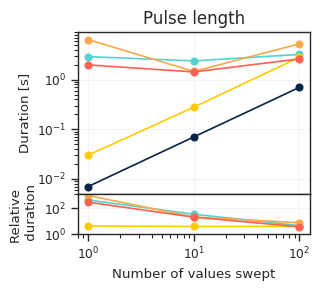

In [423]:
fig2 = get_plot(instruments_len, "Pulse length", len_max=3)

### Pulse amp

In [424]:
path = "data/scaling/"
name = "rabi_amp"

_ = json.load(open(f"{path}ideal/{name}.json"))
ideal = {key: _[key]["acquisition"] for key in _ if key != "date"}

_ = json.load(open(f"{path}rfsoc/{name}.json"))
rfsoc = {key: _[key]["acquisition"] for key in _ if key != "date"}

_ = json.load(open(f"{path}zh/{name}.json"))
zurich = {key: _[key]["acquisition"] for key in _ if key != "date"}

_ = json.load(open(f"{path}qm/{name}.json"))
qm = {key: _[key]["acquisition"] for key in _ if key != "date"}

_ = json.load(open(f"{path}qblox/{name}.json"))
qblox = {key: _[key]["acquisition"] for key in _ if key != "date"}

In [425]:
instruments_amp = [
    ("Ideal", ideal, "#072448"),
    ("ZI", zurich, "#54d2d2"),
    ("RFSoC", rfsoc, "#ffcb00"),
    ("QM", qm, "#f8aa4b"),
    ("QBlox", qblox, "#ff6150"),
]

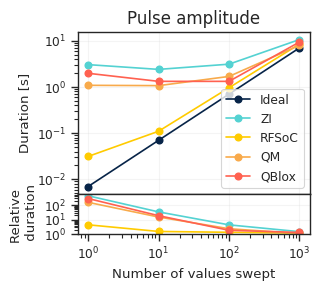

In [426]:
fig3 = get_plot(instruments_amp, "Pulse amplitude", legend=True)

### Pulse start

In [427]:
path = "data/scaling/"
name = "t1"

_ = json.load(open(f"{path}ideal/{name}.json"))
ideal = {key: _[key]["acquisition"] for key in _ if key != "date"}

_ = json.load(open(f"{path}rfsoc/{name}.json"))
rfsoc = {key: _[key]["acquisition"] for key in _ if key != "date"}

_ = json.load(open(f"{path}zh/{name}.json"))
zurich = {key: _[key]["acquisition"] for key in _ if key != "date"}

_ = json.load(open(f"{path}qm/{name}.json"))
qm = {key: _[key]["acquisition"] for key in _ if key != "date"}

_ = json.load(open(f"{path}qblox/{name}.json"))
qblox = {key: _[key]["acquisition"] for key in _ if key != "date"}

In [428]:
instruments_start = [
    ("Ideal", ideal, "#072448"),
    ("Zhinst", zurich, "#54d2d2"),
    ("RFSoC", rfsoc, "#ffcb00"),
    ("QM", qm, "#f8aa4b"),
    ("QBlox", qblox, "#ff6150"),
]

array([<Axes: title={'center': 'Pulse start'}, ylabel='Duration [s]'>,
       <Axes: xlabel='Number of values swept', ylabel='Relative \n duration'>],
      dtype=object)

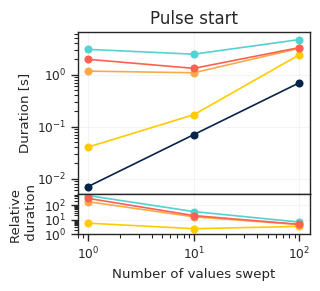

In [429]:
get_plot(instruments_start, "Pulse start", len_max=3)

### RB

In [430]:
path = "data/scaling/"
name = "rb"

_ = json.load(open(f"{path}ideal/{name}.json"))
ideal = {key: _[key]["acquisition"] for key in _ if key != "date"}

_ = json.load(open(f"{path}rfsoc/{name}.json"))
rfsoc = {key: _[key]["acquisition"] for key in _ if key != "date"}

_ = json.load(open(f"{path}zh/{name}.json"))
zurich = {key: _[key]["acquisition"] for key in _ if key != "date"}

_ = json.load(open(f"{path}qm/{name}.json"))
qm = {key: _[key]["acquisition"] for key in _ if key != "date"}

_ = json.load(open(f"{path}qblox/{name}.json"))
qblox = {key: _[key]["acquisition"] for key in _ if key != "date"}

In [431]:
instruments_rb = [
    ("Ideal", ideal, "#072448"),
    ("Zhinst", zurich, "#54d2d2"),
    ("RFSoC", rfsoc, "#ffcb00"),
    ("QM", qm, "#f8aa4b"),
    ("QBlox", qblox, "#ff6150"),
]

array([<Axes: title={'center': 'Circuits'}, ylabel='Duration [s]'>,
       <Axes: xlabel='Number of iterations', ylabel='Relative \n duration'>],
      dtype=object)

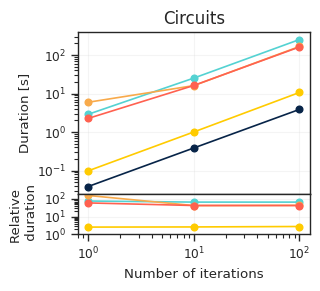

In [432]:
get_plot(instruments_rb, "Circuits", "Number of iterations")

### Tot

In [389]:
def get_plots(_instruments_list, titles):
    
    fig_tot = plt.figure(figsize=(12, 15), constrained_layout=True)
    subfigs = fig_tot.subfigures(3, 2)

    for idx, fig in enumerate(subfigs.flat):
        title = titles[idx]
        _instruments = _instruments_list[idx]

        axes = fig.subplots(2, 1, height_ratios=[0.8, 0.2], sharex=True)
        #fig, axes = plt.subplots(2, 1, figsize =(6, 5), 
        #plt.subplots_adjust(wspace=0, hspace=0)

        for ins in _instruments:
            axes[0].plot([10**i for i in range(len(ins[1]))], list(ins[1].values()), label=ins[0], color=ins[2], marker='o')
        
        if idx == 0:
            fig_tot.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
              ncol=5, mode="expand", borderaxespad=0.)
        if idx == 0 or idx == 2:
            pass
            #axes[0].set_ylabel("Experiment duration [s]")
            #axes[1].set_ylabel("Experiment duration\n(ratio with ideal time)", rotation=0)
            #axes[1].yaxis.set_label_coords(-.25, 0.3)
        if idx == 4 or idx == 5:
            axes[1].set_xlabel("Number of values swept")
            
        #axes[0].legend()
        axes[0].set_xscale('log')
        axes[0].set_yscale('log')


        real_instruments = copy.deepcopy(_instruments[1:])
        for inst in real_instruments:
            for idx, el in enumerate(inst[1]):
                inst[1][el] /= _instruments[0][1][el]

        for ins in real_instruments:
            axes[1].plot([10**i for i in range(len(ins[1]))], list(ins[1].values()), label=ins[0], color=ins[2], marker='o')

        
        axes[1].set_yscale('log')

        axes[0].set_title(title)
        
        axes[0].grid(alpha=0.2)
        axes[1].grid(alpha=0.2)
        
    plt.savefig("scalings.pdf",
                bbox_inches ="tight")

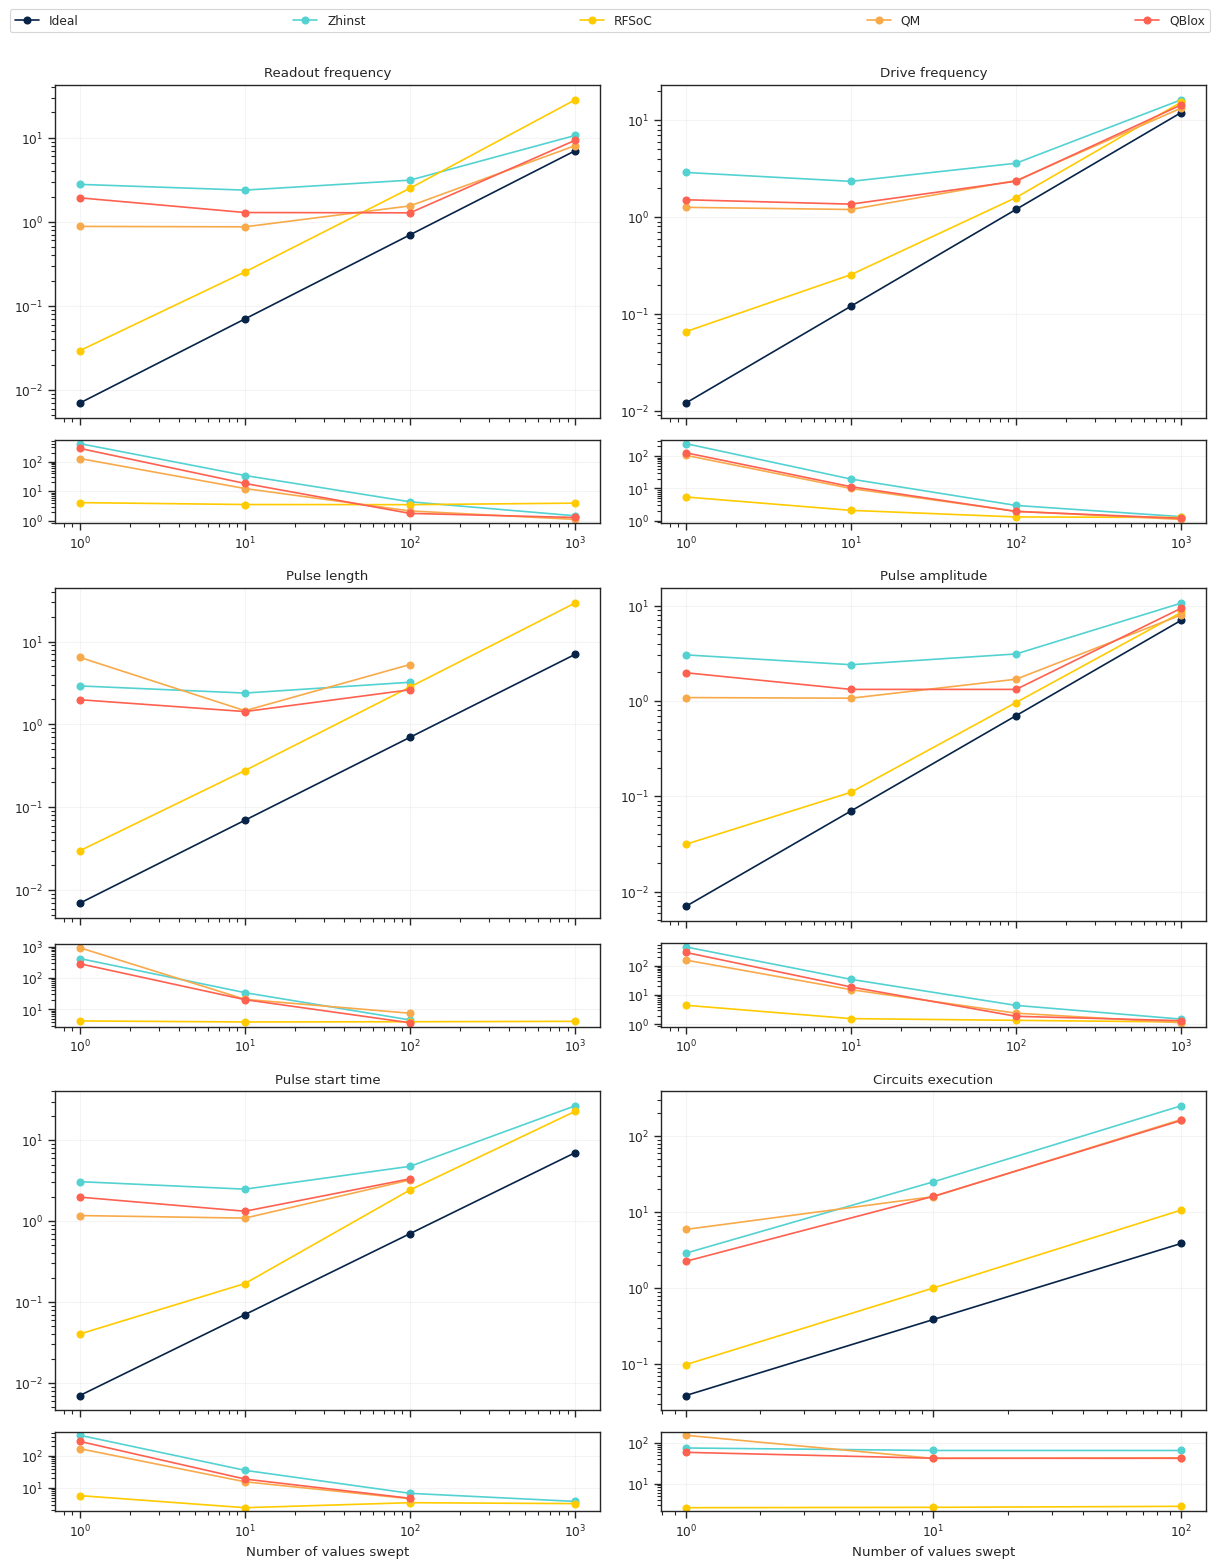

In [390]:
get_plots([instruments_ro_freq, instruments_drive_freq, instruments_len, instruments_amp, instruments_start, instruments_rb], 
          [
              "Readout frequency", 
              "Drive frequency", 
              "Pulse length", 
              "Pulse amplitude",
              "Pulse start time",
              "Circuits execution"
          ])